In [1]:
# %pip install pandas
# %pip install numpy
# %pip install sklearn
# %pip install matplotlib
# %pip install pyswarm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [4]:

target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

def generate_sample(n, n_dims, lower, upper, target_func):
    """
    Generates data sample 1.
    """
    np.random.seed(42)
    X = np.random.rand(n_dims, n)
    for i in range(n_dims):
        X[i] = X[i]*(upper[i]-lower[i]) + lower[i]
    y = target_func(X)
    
    return (X,y)

In [19]:
sample1 = generate_sample(70, 2, (-2.5, -1.5), (1.5, 2.5), target_func)

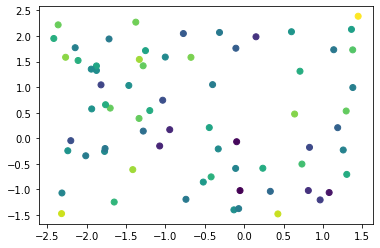

In [20]:
plt.scatter(sample1[0][0], sample1[0][1], c=sample1[1])

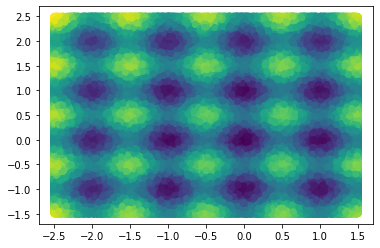

In [21]:
sample_test = generate_sample(1000000, 2, (-2.5, -1.5), (1.5, 2.5), target_func)
plt.scatter(sample_test[0][0], sample_test[0][1], c=sample_test[1])

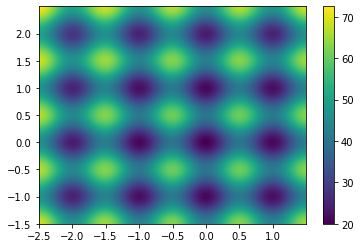

In [29]:
m = np.arange(-2.5,1.5,0.001)
p = np.arange(-1.5,2.5,0.001)

X = np.array(np.meshgrid(m, p))
Z = target_func(X)

plt.pcolormesh(m,p,Z)
plt.colorbar()

In [ ]:
    # kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    # gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    # gpr.fit(x[:, np.newaxis], y)

    # # Predict
    # x_new = np.linspace(0, 1, 1000)
    # y_new = gpr.predict(x_new[:, np.newaxis])

    # # Plot the results
    # plt.figure(figsize=(10, 5))
    # plt.scatter(x, y, label="Training data")
    # plt.plot(x_new, y_new, label="Prediction")
    # plt.xlabel("x")
    # plt.ylabel("y")
    # plt.legend()
    # plt.show()
    # return gpr